<a href="https://colab.research.google.com/github/RoseKyalo/Bayesian-checkpoint/blob/master/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

NLP or Natural language processing ensures that AI can understand the natural human languages we speak everyday.It allows computers to understand human language, whether it be written, spoken, or even scribbled

The data utilized [here](https://zindi.africa/competitions/gender-based-violence-tweet-classification) is from the Zindi Hackathon; feel free to experiment with it more.

In [ ]:
import pandas as pd
import re , string


In [ ]:
#loading the dataset
df= pd.read_csv("/content/Train.csv")
df

,Tweet_ID,tweet,type
0,ID_0022DWKP,Had a dream i got raped last night. By a guy i...,sexual_violence
1,ID_00395QYM,he thought the word raped means sex and told m...,sexual_violence
2,ID_003EOSSF,She NOT TALKING TO ME I WAS RAPED BY 2 MEN 1 M...,sexual_violence
3,ID_004BBHOD,I was sexually abused for 3 years at age 4 to ...,sexual_violence
4,ID_004F7516,Chessy Prout can do better by telling the trut...,sexual_violence
...,...,...,...
39645,ID_ZZTLP2L5,"ENTRY 1299: 21F. 23M, BF’s cousin. Got drunk o...",sexual_violence
39646,ID_ZZXB10M6,So you’re telling me Emmanuel Macron was groom...,sexual_violence
39647,ID_ZZY8B7FJ,"My wife regularly beats me, I get dirty slaps ...",Physical_violence
39648,ID_ZZYAFD8L,Me: Hey babe! Police officer boyfriend: is tha...,sexual_violence


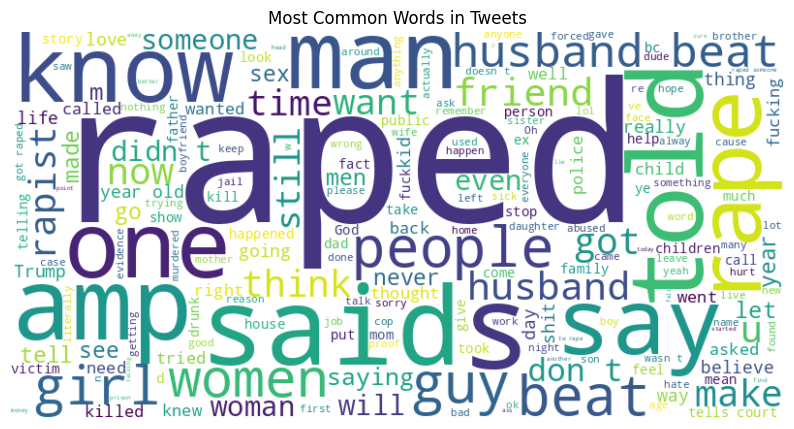

In [ ]:

#Visualizing tweet feature
import matplotlib.pyplot as plt
from wordcloud import WordCloud  # Import the WordCloud class
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["tweet"]))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()


In [ ]:
# convert to lowercase, strip and remove punctuations
def preprocess(text):
   text = text.lower()
   text=text.strip()
   text=re.compile('<.*?>').sub('', text)
   text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
   text = re.sub('\s+', ' ', text)
   text = re.sub(r'\[[0-9]*\]',' ',text)
   text=re.sub(r'[^\w\s]', '', str(text).lower().strip())
   text = re.sub(r'\d',' ',text)
   text = re.sub(r'\s+',' ',text)
   text = re.sub("@\S+", "", text)
   re.sub("\$", "", text)
   text = re.sub("https", "", text)
   text = re.sub("co", "", text)
   text = re.sub("https?:\/\/.*[\r\n]*", "", text)
   re.sub("#", "", text)

   return text

df["tweet"] = df["tweet"].apply(lambda x: preprocess(x))

In [ ]:
#Let us reveiw the tweets after removing punctuations and lowercasing it.
df.tweet

0        had a dream i got raped last night by a guy i ...
1        he thought the word raped means sex and told m...
2        she not talking to me i was raped by men moles...
3        i was sexually abused for years at age to no o...
4        chessy prout can do better by telling the trut...
                               ...                        
39645    entry f m bfs usin got drunk on halloween i li...
39646    so youre telling me emmanuel macron was groome...
39647    my wife regularly beats me i get dirty slaps h...
39648    me hey babe police officer boyfriend is that h...
39649    i will take acuntability if you think its ok f...
Name: tweet, Length: 39650, dtype: object

`What Can you see from the tweets?`

In [ ]:
df.dtypes

Tweet_ID    object
tweet       object
type        object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39650 entries, 0 to 39649
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet_ID  39650 non-null  object
 1   tweet     39650 non-null  object
 2   type      39650 non-null  object
dtypes: object(3)
memory usage: 929.4+ KB


In [ ]:
df.isna().sum()

Tweet_ID    0
tweet       0
type        0
dtype: int64

<Axes: xlabel='type', ylabel='count'>

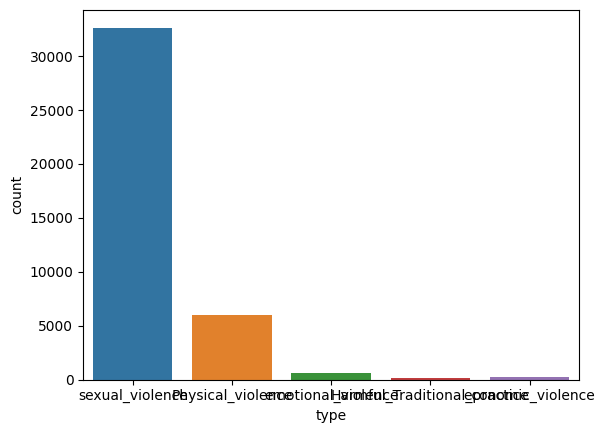

In [ ]:
#Let us view our target variable.
import seaborn as sns #loading the seaborn visualization library
sns.countplot(x="type",data=df)

In [ ]:
# Analyzing Textual Features
tweet_lengths = df["tweet"].apply(lambda x: len(x))
print("Tweet Length Distribution:")
print(tweet_lengths.describe())

Tweet Length Distribution:
count    39650.000000
mean       189.820757
std         74.111072
min          9.000000
25%        127.000000
50%        214.500000
75%        257.000000
max        288.000000
Name: tweet, dtype: float64


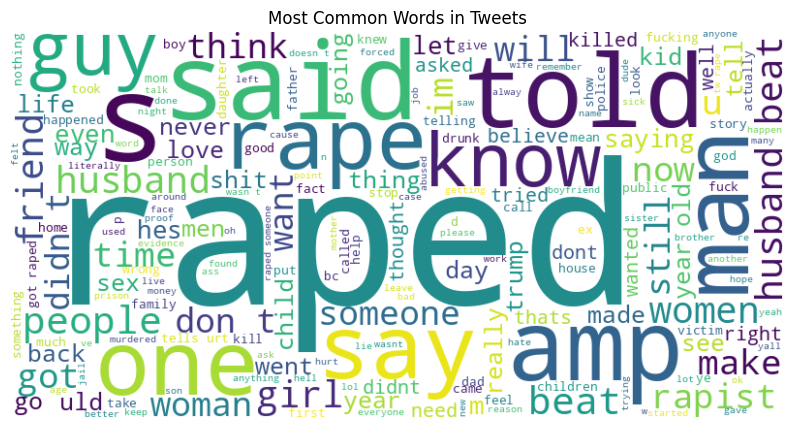

In [ ]:
#Visualizing
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(df["tweet"]))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Tweets")
plt.show()

## **Preprocessing**

In [ ]:
#We are going to encode our target column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['type'] = le.fit_transform(df['type'])

<Axes: xlabel='type', ylabel='count'>

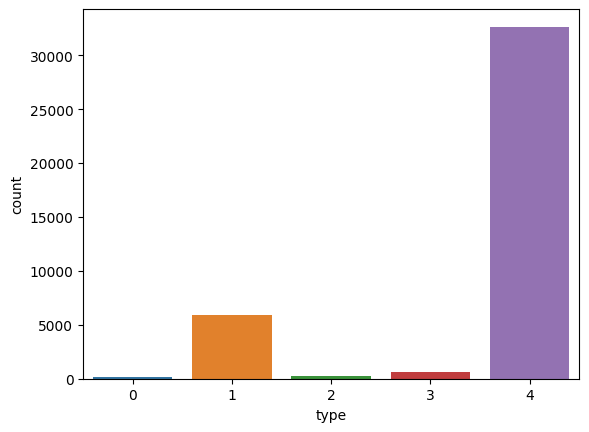

In [ ]:
#Let us visualiza our target column after encoding.
import seaborn as sns #loading the seaborn visualization library
sns.countplot(x="type",data=df)

We will import Natural Language Tool Kit (NLTK) a python library that is used

NLTK makes it easier to perform tokenization, stemming, tagging, parsing, and more.

Tokenization in NLP refers to the process of breaking down text into smaller units, called tokens. This is splitting text into words, subwords, or even characters, depending on the tokenizer used.

`Before tokenization` "Tomorrow is a new day".

`After tokenization `  'Tomorrow',  'is',  'a', 'new',  'day'


**Stop Words** are common words that are usually fiktered out of text before analysis eg "the," "and," "is," "in," and "it."

**Lemmatization**: Reduce words to their root form. For example, "running" might be reduced to "run."

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download the NLTK data for tokenization, stopwords, and WordNet
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def tokenize_and_lemmatize_dataset(df):
    # Define the set of stopwords
    stop_words = set(stopwords.words('english'))

    # Initialize the WordNet lemmatizer
    lemmatizer = WordNetLemmatizer()

    # Tokenize, lemmatize, and remove stopwords for each tweet
    df["tokenized_and_lemmatized_tweet"] = df["tweet"].apply(lambda x: [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(x) if word.isalpha() and word.lower() not in stop_words])

    # Print or return the tokenized and lemmatized data
    print("Tokenized and Lemmatized data with stopwords removed:")
    print(df["tokenized_and_lemmatized_tweet"])

    return df["tokenized_and_lemmatized_tweet"]

# Call the function
tokenized_and_lemmatized_result = tokenize_and_lemmatize_dataset(df)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Tokenized and Lemmatized data with stopwords removed:
0        [dream, got, raped, last, night, guy, work, ac...
1        [thought, word, raped, mean, sex, told, saw, d...
2        [talking, raped, men, molested, jail, nother, ...
3        [sexually, abused, year, age, one, believed, r...
4        [chessy, prout, better, telling, truth, sellin...
                               ...                        
39645    [entry, f, bfs, usin, got, drunk, halloween, l...
39646    [youre, telling, emmanuel, macron, groomed, ma...
39647    [wife, regularly, beat, get, dirty, slap, husb...
39648    [hey, babe, police, officer, boyfriend, yes, b...
39649    [take, acuntability, think, ok, live, tenn, ja...
Name: tokenized_and_lemmatized_tweet, Length: 39650, dtype: object


In [ ]:
df.head(4)

,Tweet_ID,tweet,type,tokenized_and_lemmatized_tweet
0,ID_0022DWKP,had a dream i got raped last night by a guy i ...,4,"[dream, got, raped, last, night, guy, work, ac..."
1,ID_00395QYM,he thought the word raped means sex and told m...,4,"[thought, word, raped, mean, sex, told, saw, d..."
2,ID_003EOSSF,she not talking to me i was raped by men moles...,4,"[talking, raped, men, molested, jail, nother, ..."
3,ID_004BBHOD,i was sexually abused for years at age to no o...,4,"[sexually, abused, year, age, one, believed, r..."
